In [1]:
from sklearn.datasets import make_classification
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import PrecisionRecallDisplay, confusion_matrix

# Import models
from tensorflow import keras
from keras import models, layers, activations, losses, optimizers, metrics
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

keras.utils.set_random_seed(42)

2023-10-24 22:01:14.698137: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X,y = make_classification(n_samples=10000, n_features=16, n_informative=8,
                          n_redundant=8,
                          n_classes=3, n_clusters_per_class=2, class_sep=1.5, 
                          flip_y=0, weights=[0.9, 0.05, 0.05], random_state=1)

In [3]:
X_scaled = MinMaxScaler().fit_transform(X) 
X_scaled = pd.DataFrame(X_scaled)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
0,10000.0,0.535667,0.114193,0.0,0.469127,0.545073,0.611912,1.0
1,10000.0,0.495437,0.140357,0.0,0.386392,0.487611,0.600740,1.0
2,10000.0,0.437416,0.138190,0.0,0.328155,0.469672,0.547404,1.0
3,10000.0,0.518437,0.122666,0.0,0.440849,0.521525,0.596722,1.0
4,10000.0,0.528473,0.132550,0.0,0.443661,0.530408,0.617077,1.0
5,10000.0,0.557098,0.147652,0.0,0.455306,0.567702,0.665419,1.0
6,10000.0,0.570738,0.114569,0.0,0.500176,0.573350,0.645456,1.0
7,10000.0,0.468974,0.117505,0.0,0.389426,0.473765,0.551861,1.0
8,10000.0,0.570156,0.128412,0.0,0.471415,0.561647,0.666689,1.0
9,10000.0,0.509246,0.122255,0.0,0.430186,0.510008,0.591441,1.0


In [4]:
pca = PCA(n_components=8)
pca.fit(X_scaled)
print(np.sum(pca.explained_variance_ratio_))
pca_X = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pca_X)
pca_df['is_anomaly'] = y
pca_df = pca_df.sort_values(by=['is_anomaly'])

0.9999999999999996


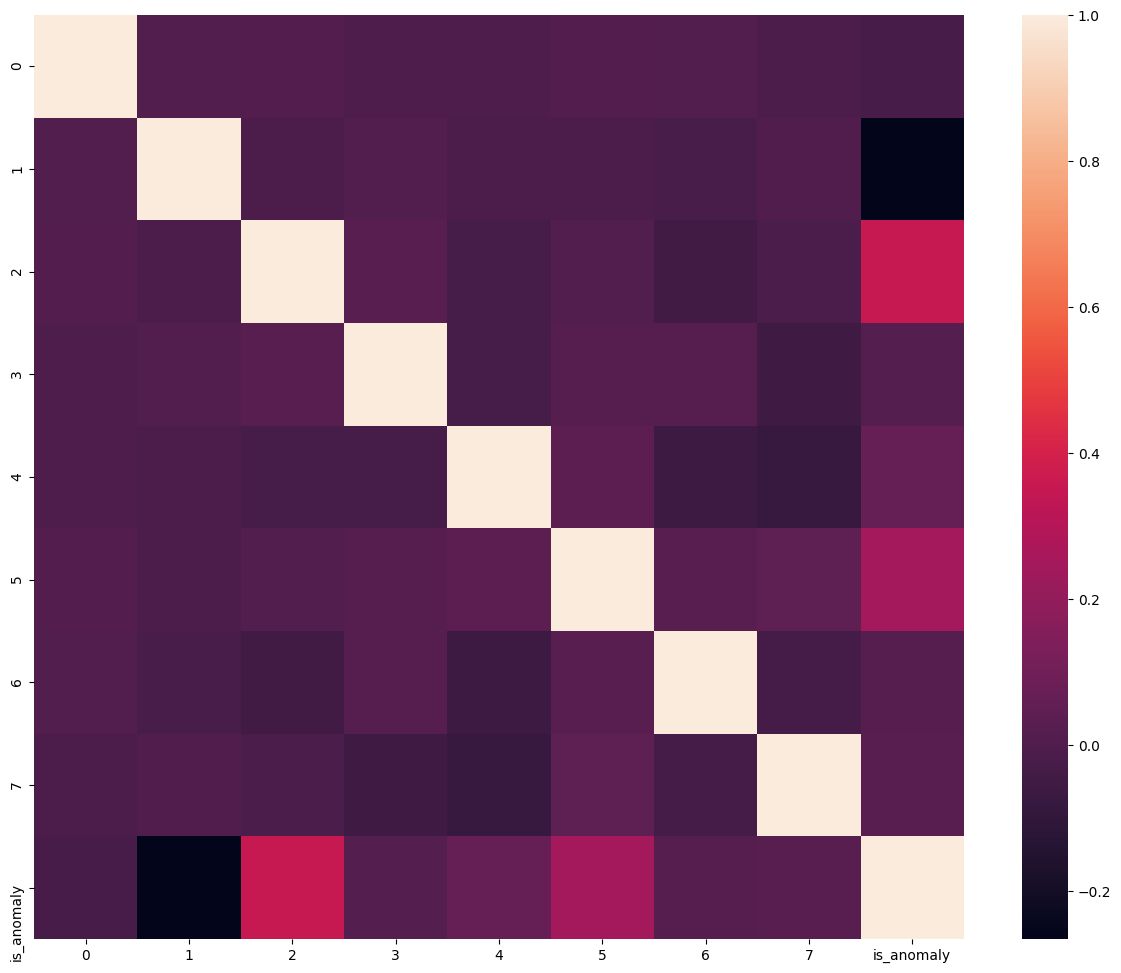

In [5]:
plot_df = pca_df[pca_df['is_anomaly'] != 2]

corr = plot_df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

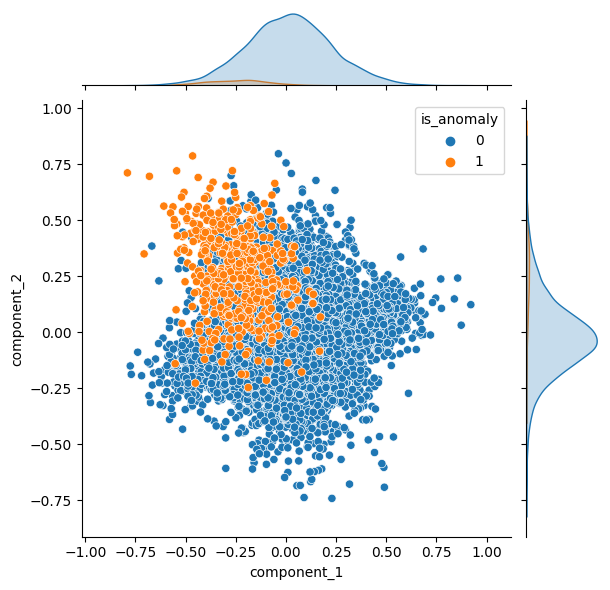

In [6]:
plot_df = plot_df.iloc[:,[1, 2, 8]]
plot_df.columns = ["component_1", "component_2", "is_anomaly"]

# Scatter plot of 2 features
sns.jointplot(data = plot_df, x="component_1", y="component_2", hue = "is_anomaly", kind='scatter')

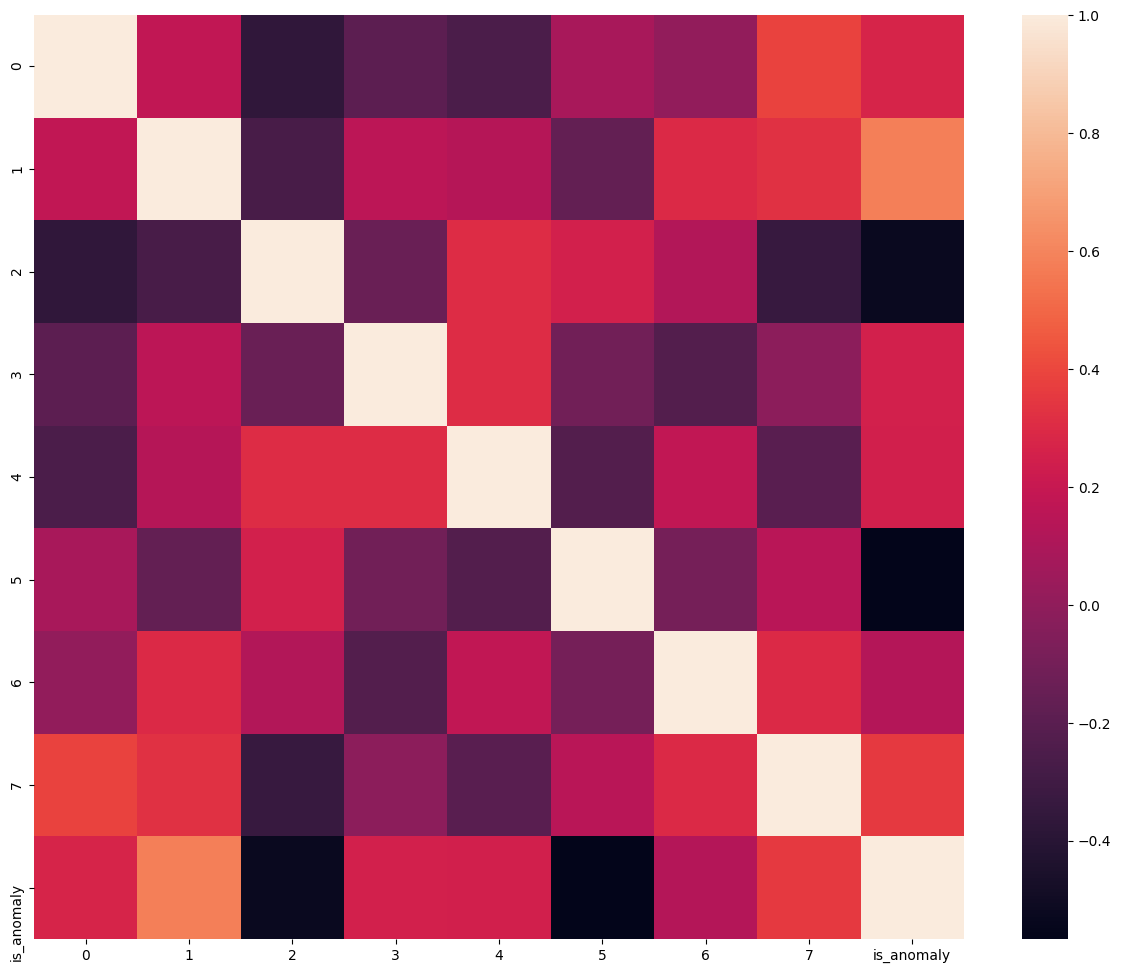

In [7]:
plot_df = pca_df[pca_df['is_anomaly'] != 0]

corr = plot_df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

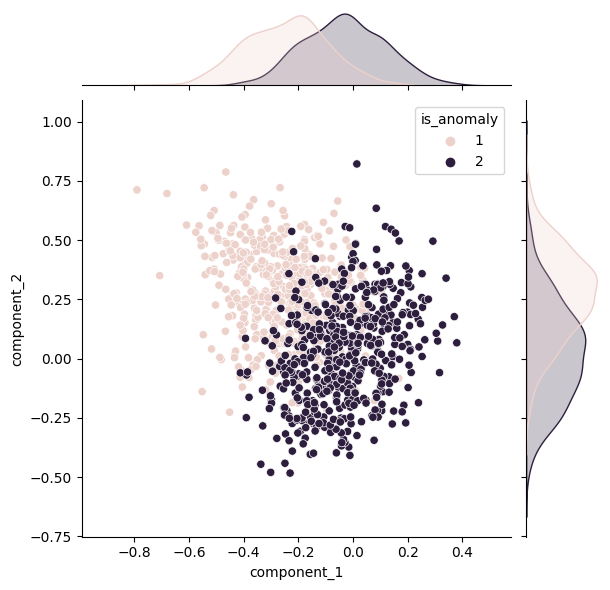

In [8]:
plot_df = plot_df.iloc[:,[1, 2, 8]]
plot_df.columns = ["component_1", "component_2", "is_anomaly"]

# Scatter plot of 2 features
sns.jointplot(data = plot_df, x="component_1", y="component_2", hue = "is_anomaly", kind='scatter')

In [9]:
all_data = pd.DataFrame(X_scaled)
all_data['is_anomaly'] = y
display(all_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,is_anomaly
0,0.510829,0.383572,0.428606,0.540761,0.495972,0.554227,0.595562,0.453741,0.507816,0.477143,0.514513,0.401551,0.476156,0.502556,0.635609,0.454094,0
1,0.687241,0.367644,0.478786,0.351068,0.362885,0.429298,0.499670,0.357972,0.522531,0.653802,0.572412,0.508141,0.403226,0.488532,0.769917,0.642335,0
2,0.559364,0.620473,0.592103,0.390314,0.229503,0.548329,0.257420,0.494318,0.477775,0.548909,0.732002,0.576915,0.427612,0.519671,0.707357,0.456889,1
3,0.334862,0.368503,0.121445,0.596606,0.690363,0.913218,0.524991,0.345917,0.494355,0.306497,0.869433,0.720487,0.655844,0.408912,0.376290,0.557441,0
4,0.628953,0.425348,0.298101,0.312068,0.518313,0.626526,0.645628,0.314274,0.355877,0.716207,0.576651,0.662907,0.468759,0.330934,0.860853,0.773343,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.448306,0.477778,0.299967,0.628337,0.538547,0.723975,0.639387,0.509508,0.423492,0.494886,0.552669,0.543742,0.637552,0.392606,0.571477,0.521236,0
9996,0.531890,0.704328,0.543176,0.701662,0.559546,0.295097,0.745735,0.622605,0.655496,0.692247,0.334182,0.185032,0.609128,0.804081,0.448659,0.373924,0
9997,0.551027,0.595347,0.465938,0.546949,0.596558,0.259666,0.630858,0.480519,0.764139,0.736011,0.515354,0.365701,0.891814,0.747112,0.215499,0.410008,0
9998,0.552486,0.599634,0.530332,0.583283,0.424931,0.706551,0.519019,0.601396,0.492020,0.376718,0.437004,0.357673,0.248535,0.537681,0.801355,0.419282,0


In [10]:
df_iter1 = all_data[all_data['is_anomaly'] != 2]
display(df_iter1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,is_anomaly
0,0.510829,0.383572,0.428606,0.540761,0.495972,0.554227,0.595562,0.453741,0.507816,0.477143,0.514513,0.401551,0.476156,0.502556,0.635609,0.454094,0
1,0.687241,0.367644,0.478786,0.351068,0.362885,0.429298,0.499670,0.357972,0.522531,0.653802,0.572412,0.508141,0.403226,0.488532,0.769917,0.642335,0
2,0.559364,0.620473,0.592103,0.390314,0.229503,0.548329,0.257420,0.494318,0.477775,0.548909,0.732002,0.576915,0.427612,0.519671,0.707357,0.456889,1
3,0.334862,0.368503,0.121445,0.596606,0.690363,0.913218,0.524991,0.345917,0.494355,0.306497,0.869433,0.720487,0.655844,0.408912,0.376290,0.557441,0
4,0.628953,0.425348,0.298101,0.312068,0.518313,0.626526,0.645628,0.314274,0.355877,0.716207,0.576651,0.662907,0.468759,0.330934,0.860853,0.773343,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.448306,0.477778,0.299967,0.628337,0.538547,0.723975,0.639387,0.509508,0.423492,0.494886,0.552669,0.543742,0.637552,0.392606,0.571477,0.521236,0
9996,0.531890,0.704328,0.543176,0.701662,0.559546,0.295097,0.745735,0.622605,0.655496,0.692247,0.334182,0.185032,0.609128,0.804081,0.448659,0.373924,0
9997,0.551027,0.595347,0.465938,0.546949,0.596558,0.259666,0.630858,0.480519,0.764139,0.736011,0.515354,0.365701,0.891814,0.747112,0.215499,0.410008,0
9998,0.552486,0.599634,0.530332,0.583283,0.424931,0.706551,0.519019,0.601396,0.492020,0.376718,0.437004,0.357673,0.248535,0.537681,0.801355,0.419282,0


In [11]:
X = df_iter1.drop(['is_anomaly'], axis = 1)
y = df_iter1['is_anomaly']

In [12]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=df_iter1['is_anomaly'])

print(y_train.value_counts())
print(y_test.value_counts())

is_anomaly
0    7200
1     400
Name: count, dtype: int64
is_anomaly
0    1800
1     100
Name: count, dtype: int64


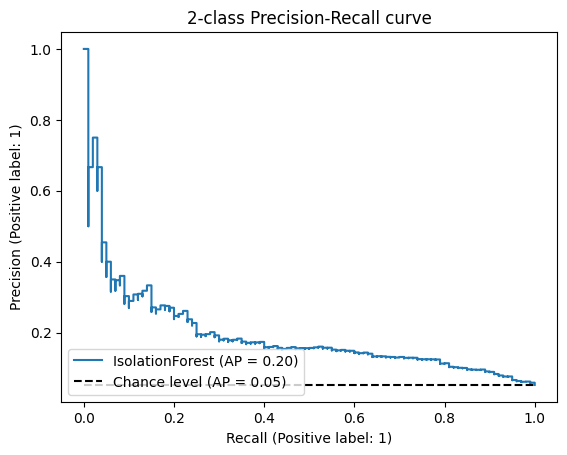

In [13]:
clf_IF = IsolationForest(random_state=42).fit(X_train)

y_train_pred = clf_IF.predict(X_train) * -1
y_train_pred[y_train_pred == -1] = 0
confusion_matrix(y_train, y_train_pred)

y_test_pred = clf_IF.predict(X_test) * -1
y_test_pred[y_test_pred == -1] = 0
confusion_matrix(y_test, y_test_pred)

y_score = clf_IF.decision_function(X_test) * -1

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="IsolationForest", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

[[1798    2]
 [  41   59]]


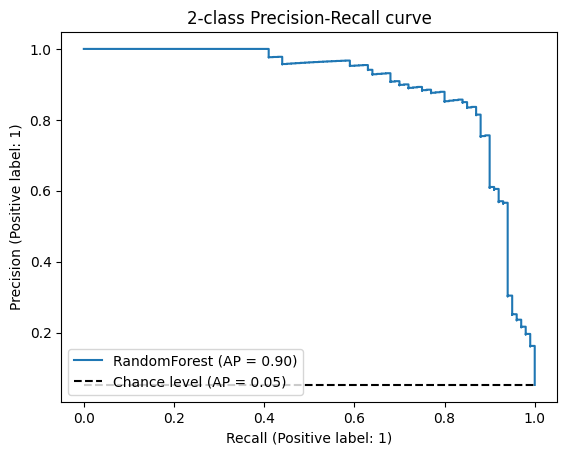

In [14]:
clf_RF = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state=42).fit(X_train, y_train)

y_test_pred = clf_RF.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))

y_score = clf_RF.predict_proba(X_test)[:,1]

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="RandomForest", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [15]:
import numpy as np
df_val = all_data.loc[all_data['is_anomaly'] == 2, :]
print(len(df_val))
X = df_val.drop(['is_anomaly'], axis = 1)
y = np.array(df_val['is_anomaly'])
y[y == 2] = 1

500


In [16]:
X_test = np.concatenate((X_test[y_test == 0],X))
y_test = np.concatenate((y_test[y_test == 0],y))

X_test.shape

(2300, 16)

[[1638  162]
 [ 416   84]]


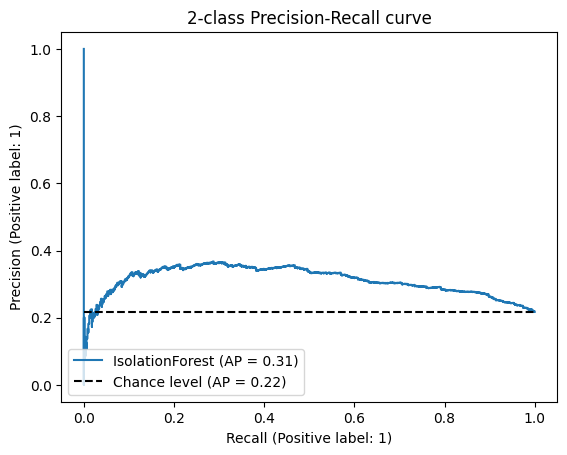

In [17]:
y_test_pred = clf_IF.predict(X_test) * -1
y_test_pred[y_test_pred == -1] = 0
print(confusion_matrix(y_test, y_test_pred))

y_score = clf_IF.decision_function(X_test) * -1

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="IsolationForest", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

[[1798    2]
 [ 496    4]]


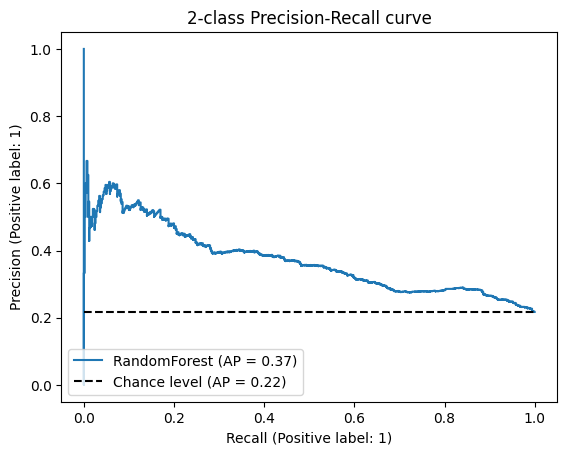

In [18]:
y_test_pred = clf_RF.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))

y_score = clf_RF.predict_proba(X_test)[:,1]

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="RandomForest", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [19]:
X_train_normals = X_train[y_train == 0]
X_train_normals.shape

(7200, 16)

In [20]:
n_features = 16

# model
encoder = models.Sequential(name='encoder')
encoder.add(layer=layers.Dense(units=16, activation='relu', input_shape=(n_features,)))
encoder.add(layers.Dropout(0.2))
encoder.add(layer=layers.Dense(units=8, activation='relu'))

decoder = models.Sequential(name='decoder')
decoder.add(layer=layers.Dense(units=8, activation='relu', input_shape=(8,)))
decoder.add(layers.Dropout(0.2))
decoder.add(layer=layers.Dense(units=16, activation='relu'))
decoder.add(layers.Dropout(0.2))
decoder.add(layer=layers.Dense(units=n_features, activation='sigmoid'))

autoencoder = models.Sequential([encoder, decoder])

autoencoder.compile(
    loss=losses.mean_squared_error,
    optimizer=optimizers.Adam(),
    metrics=[metrics.mean_squared_error])

autoencoder.save_weights('init.h5')

print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
Total params: 408 (1.59 KB)
Trainable params: 408 (1.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropou

Epoch 1/50
225/225 [==============================] - 1s 2ms/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 2/50
225/225 [==============================] - 0s 2ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 3/50
225/225 [==============================] - 0s 2ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 4/50
225/225 [==============================] - 0s 2ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 5/50
225/225 [==============================] - 0s 2ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 6/50
225/225 [==============================] - 0s 2ms/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 7/50
225/225 [========

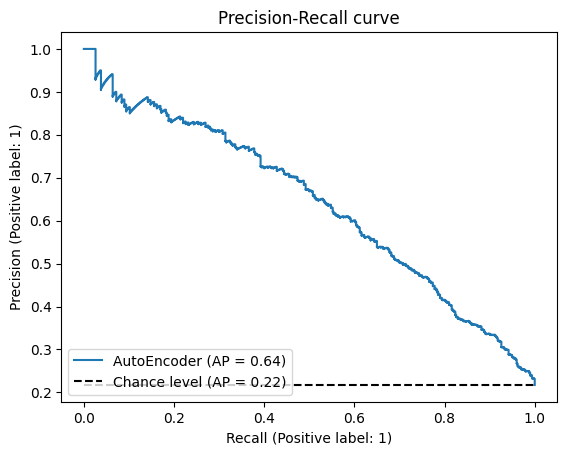

In [21]:
autoencoder.load_weights('init.h5')

es = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, restore_best_weights=True)

history = autoencoder.fit(x=X_train_normals, y=X_train_normals, epochs=50, 
                      batch_size=32, shuffle=True, verbose=1, 
                      validation_data=(X_train_normals, X_train_normals), 
                      callbacks=[es])

predicted_test = autoencoder.predict(x=X_test)

y_score = losses.mean_squared_error(predicted_test, X_test)

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="AutoEncoder", plot_chance_level=True
)
_ = display.ax_.set_title("Precision-Recall curve")

Epoch 1/50
238/238 [==============================] - 1s 2ms/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 2/50
238/238 [==============================] - 0s 2ms/step - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 3/50
238/238 [==============================] - 0s 2ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 4/50
238/238 [==============================] - 0s 2ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 5/50
238/238 [==============================] - 0s 2ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 6/50
238/238 [==============================] - 0s 2ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 7/50
238/238 [========

230/230 [==============================] - 0s 2ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 19/50
230/230 [==============================] - 0s 2ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 20/50
230/230 [==============================] - 0s 2ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 21/50
230/230 [==============================] - 0s 2ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 22/50
230/230 [==============================] - 0s 2ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 23/50
230/230 [==============================] - 0s 2ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 24/50
230/230 [=============

229/229 [==============================] - 0s 2ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 27/50
229/229 [==============================] - 0s 2ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 28/50
229/229 [==============================] - 0s 2ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 29/50
229/229 [==============================] - 0s 616us/step
[[6207  993]
 [  94    7]]
7
7294
(7301, 16)
7294
(7294, 16)
(7294,)


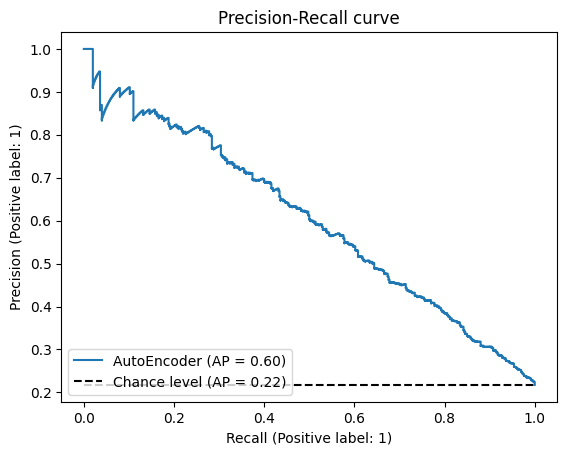

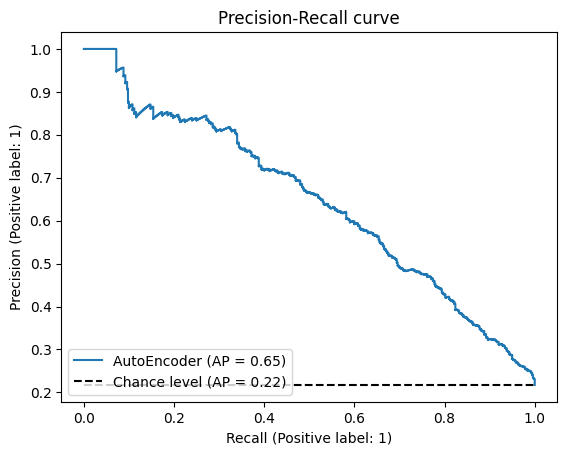

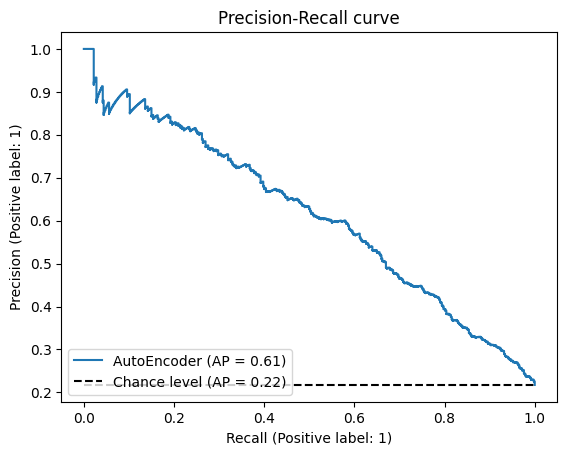

In [22]:
es = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, restore_best_weights=True)

n_vec = [1000, 1000, 1000]

for i in range(3):
    
    autoencoder.load_weights('init.h5')

    history = autoencoder.fit(x=X_train, y=X_train, epochs=50, 
                          batch_size=32, shuffle=True, verbose=1, 
                          validation_data=(X_train, X_train), 
                          callbacks=[es])
    
    predicted_test = autoencoder.predict(x=X_test)

    y_score = losses.mean_squared_error(predicted_test, X_test)

    display = PrecisionRecallDisplay.from_predictions(
        y_test, y_score, name="AutoEncoder", plot_chance_level=True
    )
    _ = display.ax_.set_title("Precision-Recall curve")
    
    predicted_train = autoencoder.predict(x=X_train)

    y_score = losses.mean_squared_error(predicted_train, X_train)
    
    y_train_pred = np.array([0] * len(y_train))
    y_train_pred[np.argsort(y_score)[-n_vec[i]:]] = 1
    print(confusion_matrix(y_train, y_train_pred))
    print(len(np.where((y_train == y_train_pred) & (y_train_pred == 1))[0]))
    print(len(np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]))
    
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    print(X_train.shape)
    retain_index = np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]
    print(len(retain_index))
    X_train = X_train.iloc[retain_index, :]
    y_train = y_train[retain_index]
    print(X_train.shape)
    print(y_train.shape)
    

[[6213  987]
 [  81   13]]
13
7281
(7294, 16)
7281
(7281, 16)
(7281,)
[[6200 1000]
 [  81    0]]
0
7281
(7281, 16)
7281
(7281, 16)
(7281,)
[[6200 1000]
 [  81    0]]
0
7281
(7281, 16)
7281
(7281, 16)
(7281,)


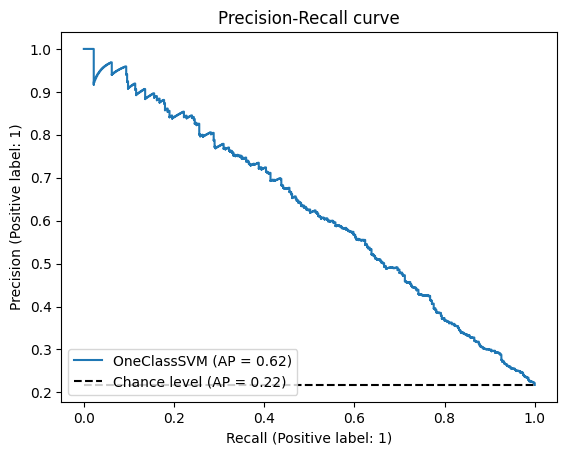

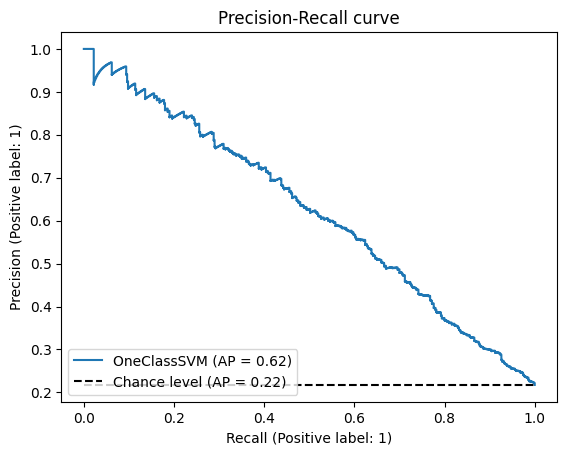

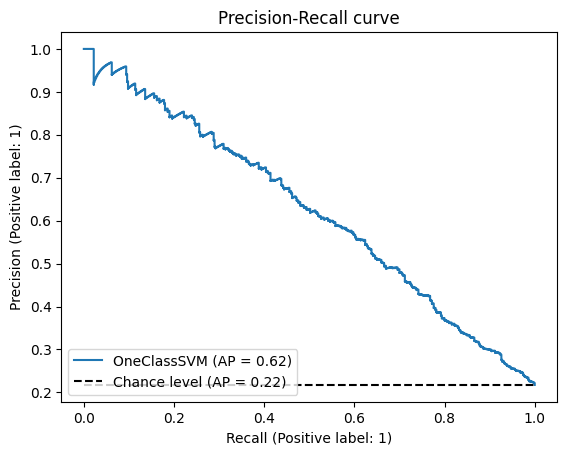

In [23]:
clf = OneClassSVM(gamma='scale', nu=0.05)

n_vec = [1000, 1000, 1000]

for i in range(3):

    clf.fit(X_train)
    
    y_score = clf.decision_function(X_test) * -1

    display = PrecisionRecallDisplay.from_predictions(
        y_test, y_score, name="OneClassSVM", plot_chance_level=True
    )
    _ = display.ax_.set_title("Precision-Recall curve")
    
    y_score = clf.decision_function(X_train) * -1
    
    y_train_pred = np.array([0] * len(y_train))
    y_train_pred[np.argsort(y_score)[-n_vec[i]:]] = 1
    print(confusion_matrix(y_train, y_train_pred))
    print(len(np.where((y_train == y_train_pred) & (y_train_pred == 1))[0]))
    print(len(np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]))
    
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    print(X_train.shape)
    retain_index = np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]
    print(len(retain_index))
    X_train = X_train.iloc[retain_index, :]
    y_train = y_train[retain_index]
    print(X_train.shape)
    print(y_train.shape)
    

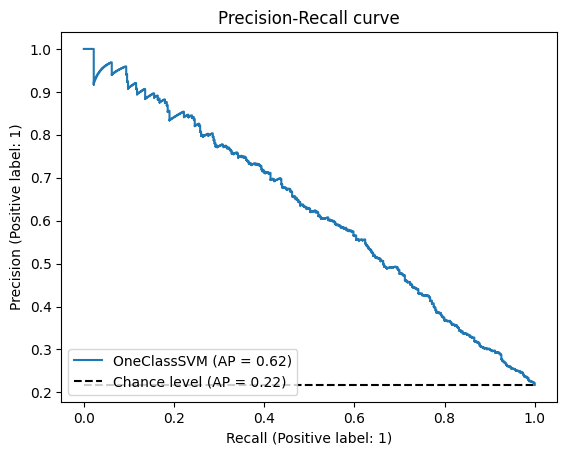

In [24]:
clf.fit(X_train_normals)
    
y_score = clf.decision_function(X_test) * -1

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="OneClassSVM", plot_chance_level=True
)
_ = display.ax_.set_title("Precision-Recall curve")